In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
scores_rel = pd.read_csv('ml-20m/genome-scores.csv')
scores_rel
#scores_rel.tail(10)

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675
...,...,...,...
11709763,131170,1124,0.58775
11709764,131170,1125,0.01075
11709765,131170,1126,0.01575
11709766,131170,1127,0.11450


In [14]:
tag_id = pd.read_csv('ml-20m/genome-tags.csv')
tag_id

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [17]:
tags = pd.read_csv('ml-20m/tags.csv')
tags

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
...,...,...,...,...
465559,138446,55999,dragged,1358983772
465560,138446,55999,Jason Bateman,1358983778
465561,138446,55999,quirky,1358983778
465562,138446,55999,sad,1358983772


In [56]:
links = pd.read_csv('ml-20m/links.csv')
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
27273,131254,466713,4436.0
27274,131256,277703,9274.0
27275,131258,3485166,285213.0
27276,131260,249110,32099.0


In [20]:
movies = pd.read_csv('ml-20m/movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [223]:
ratings = pd.read_csv('ml-20m/ratings.csv')
ratings.dropna()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944


In [28]:
#Q1

In [29]:
selected_data = tags[tags.movieId==3]
selected_data

,userId,movieId,tag,timestamp
11900,2274,3,old people that is actually funny,1208582114
61862,14260,3,sequel fever,1139200232
74259,18390,3,grun running,1161649436
81428,20434,3,moldy,1153650486
81429,20434,3,old,1153650483
90678,23068,3,comedinha de velhinhos engraÃƒÂ§ada,1215104388
108428,27074,3,Funniest Movies,1137392925
150331,42640,3,sequel,1354556170
173443,52520,3,Jack Lemmon,1161144193
173444,52520,3,Walter Matthau,1161144194


In [222]:
selected_rat = ratings[ratings.userId==1]
selected_rat

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
170,1,8507,5.0,1094786027
171,1,8636,4.5,1112485493
172,1,8690,3.5,1112484795
173,1,8961,4.0,1112485629


In [45]:
movie_group = ratings.groupby('movieId')
movie_group.get_group(2).count()

userId       22243
movieId      22243
rating       22243
timestamp    22243
dtype: int64

In [46]:
ratings.groupby('movieId').count()

,userId,rating,timestamp
movieId,,,
1,49695,49695,49695
2,22243,22243,22243
3,12735,12735,12735
4,2756,2756,2756
5,12161,12161,12161
...,...,...,...
131254,1,1,1
131256,1,1,1
131258,1,1,1


In [224]:
ratings[ratings.userId==1].count()

userId       175
movieId      175
rating       175
timestamp    175
dtype: int64

In [49]:
#Q2

In [225]:
user_watch_movie_count = ratings.groupby('userId')['movieId'].count().sort_values(ascending=True)
user_watch_movie_count

userId
39574       20
61692       20
20578       20
68139       20
21882       20
          ... 
125794    5491
121535    5520
82418     5646
8405      7515
118205    9254
Name: movieId, Length: 138493, dtype: int64

In [324]:
list_user = [x for x in user_watch_movie_count]
list_user

[20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,


In [227]:
def avg(data, step):
    for i, _ in enumerate(data[::step]):
        if(i+1 == 10):
            sub_list = data[i*step:]
            yield(sum(sub_list)/float(len(sub_list)))
            break
        else:
            sub_list = data[i*step:] if (i+1)*step > len(data) else data[i*step:(i+1)*step]  # Condition if the len(data) % step != 0
        yield(sum(sub_list)/float(len(sub_list)))  # Dividing by float' to get decimal value as average (Not needed in Python 3)

In [290]:
def sum_range(data, step):
    for i, _ in enumerate(data[::step]):
        if(i+1 == 10):
            sub_list = data[i*step:]
            yield(sum(sub_list))
            break
        else:
            sub_list = data[i*step:] if (i+1)*step > len(data) else data[i*step:(i+1)*step]  # Condition if the len(data) % step != 0
        yield(sum(sub_list))  # Dividing by float' to get decimal value as average (Not needed in Python 3)

In [292]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
a
list(sum_range(a, int(len(a)/10)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 33]

In [228]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
a[2:5]

[3, 4, 5]

In [229]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
a
list(avg(a, int(len(a)/10)))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 11.0]

In [230]:
user_watch_movie_count

userId
39574       20
61692       20
20578       20
68139       20
21882       20
          ... 
125794    5491
121535    5520
82418     5646
8405      7515
118205    9254
Name: movieId, Length: 138493, dtype: int64

In [231]:
int(len(list_user))

138493

In [232]:
sum(list_user[13849*9:])/len(list_user[13849*9:])

660.8301328328039

In [233]:
int(len(list_user)/10)

13849

In [325]:
sum(list_user)

20000263

In [234]:
list_user[::-1]

[9254,
 7515,
 5646,
 5520,
 5491,
 5447,
 5356,
 5330,
 5169,
 4988,
 4785,
 4707,
 4524,
 4354,
 4236,
 4182,
 4101,
 4094,
 4093,
 3958,
 3908,
 3864,
 3804,
 3742,
 3739,
 3662,
 3650,
 3637,
 3609,
 3602,
 3589,
 3541,
 3508,
 3488,
 3452,
 3449,
 3426,
 3419,
 3397,
 3383,
 3379,
 3291,
 3282,
 3187,
 3184,
 3171,
 3145,
 3120,
 3111,
 3101,
 3101,
 3084,
 3069,
 3037,
 3027,
 3014,
 2966,
 2965,
 2914,
 2909,
 2909,
 2898,
 2886,
 2879,
 2877,
 2856,
 2844,
 2837,
 2821,
 2806,
 2801,
 2797,
 2786,
 2780,
 2766,
 2763,
 2759,
 2753,
 2752,
 2744,
 2740,
 2736,
 2733,
 2721,
 2711,
 2709,
 2707,
 2697,
 2691,
 2685,
 2670,
 2654,
 2651,
 2646,
 2645,
 2644,
 2639,
 2608,
 2608,
 2608,
 2595,
 2594,
 2589,
 2576,
 2575,
 2561,
 2558,
 2555,
 2553,
 2547,
 2545,
 2540,
 2534,
 2531,
 2529,
 2517,
 2514,
 2491,
 2488,
 2483,
 2478,
 2477,
 2464,
 2458,
 2456,
 2448,
 2426,
 2419,
 2415,
 2411,
 2400,
 2395,
 2394,
 2391,
 2384,
 2382,
 2374,
 2369,
 2368,
 2358,
 2351,
 2345,
 2339,

In [293]:
data_sum = list(sum_range(list_user, int(len(list_user)/10)))
data_sum

[296819,
 373349,
 479921,
 625875,
 816932,
 1095471,
 1503957,
 2164406,
 3489714,
 9153819]

In [241]:
data = list(avg(list_user, int(len(list_user)/10)))
data

[21.432522203769224,
 26.958552964112933,
 34.653837822225434,
 45.1927937035165,
 58.988519026644525,
 79.10109033143188,
 108.59679399234602,
 156.2860856379522,
 251.98310347317496,
 660.8301328328039]

In [247]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bins

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

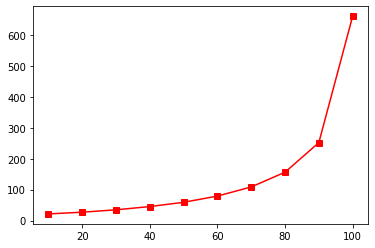

In [251]:
plt.plot(bins,data,'s-',color = 'r')

In [277]:
bins = ['0%-10%', '10%-20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-70%', '70%-80%', '80%-90%', '90%-100%']
bins

['0%-10%',
 '10%-20%',
 '20%-30%',
 '30%-40%',
 '40%-50%',
 '50%-60%',
 '60%-70%',
 '70%-80%',
 '80%-90%',
 '90%-100%']

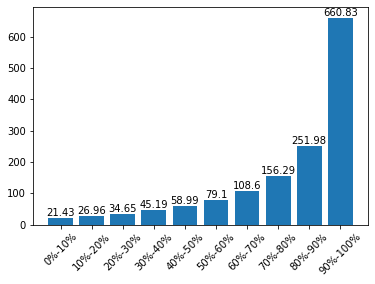

In [289]:
plt.xticks(rotation=45)
rects = plt.bar(x=bins, height=data)

for rect in rects:
    plt.text(rect.get_x()+rect.get_width()/2.0, rect.get_height(), '{x}'.format(x = round(rect.get_height(), 2)), ha='center', va='bottom')

In [267]:
import numpy as np
bins = np.arange(0, 100, 10)
bins

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

<BarContainer object of 10 artists>

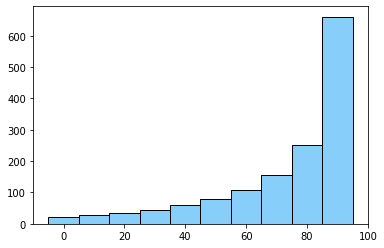

In [272]:
plt.bar(bins, data, width=10, facecolor = 'lightskyblue', edgecolor = 'black')

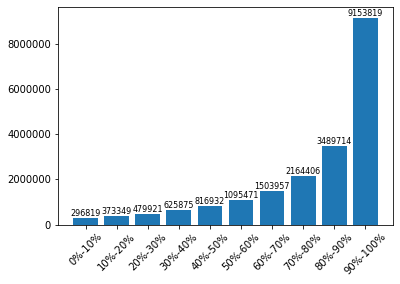

In [315]:
plt.xticks(rotation=45)
rects = plt.bar(x=bins, height=data_sum)

i=0
for rect in rects:
    plt.text(rect.get_x()+rect.get_width()/2.0, rect.get_height(), '{x}'.format(x = round(rect.get_height(), 2)), ha='center', va='bottom', fontsize=8)
    i+=1

In [316]:
#Q3

In [317]:
ratings

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944


In [320]:
movie_be_watched_count = ratings.groupby('movieId')['userId'].count().sort_values(ascending=True)
movie_be_watched_count

movieId
131262        1
84436         1
84442         1
84500         1
84534         1
          ...  
480       59715
593       63299
318       63366
356       66172
296       67310
Name: userId, Length: 26744, dtype: int64

In [326]:
list_user = [x for x in movie_be_watched_count]
list_user

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [334]:
sum(list_user)

20000263

In [333]:
len(list_user)

26744

In [332]:
int(len(list_user)/10)

2674

In [327]:
data_sum = list(sum_range(list_user, int(len(list_user)/10)))
data_sum

[2674, 4050, 8007, 15538, 32406, 81184, 207658, 571474, 1861681, 17215591]

In [330]:
bins = ['0%-10%', '10%-20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-70%', '70%-80%', '80%-90%', '90%-100%']
bins

['0%-10%',
 '10%-20%',
 '20%-30%',
 '30%-40%',
 '40%-50%',
 '50%-60%',
 '60%-70%',
 '70%-80%',
 '80%-90%',
 '90%-100%']

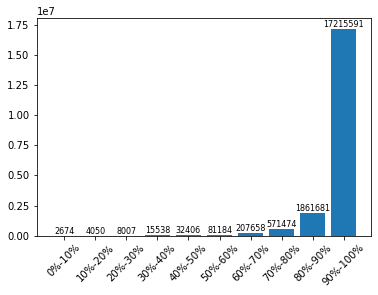

In [331]:
plt.xticks(rotation=45)
rects = plt.bar(x=bins, height=data_sum)

i=0
for rect in rects:
    plt.text(rect.get_x()+rect.get_width()/2.0, rect.get_height(), '{x}'.format(x = round(rect.get_height(), 2)), ha='center', va='bottom', fontsize=8)
    i+=1

In [335]:
#Q4

In [337]:
ratings

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944


In [339]:
ratings.groupby('timestamp')['userId'].count()

timestamp
789652004      1
789652009      3
822873600     42
823185196      2
823185197      2
              ..
1427781651     1
1427781797     1
1427782286     1
1427782288     1
1427784002     1
Name: userId, Length: 15351121, dtype: int64

In [355]:
import math

def ChangeToHours(time_stamp):
    hours = 0 + (time_stamp%(3600*24))/3600
    print("hours = {}".format(hours))
    if(hours == 0):
        hour_str = "00:00-01:00";
    else:
        hour_str = str(math.floor(hours))+":00"+"-"+str(math.ceil(hours))+":00"
    
    return hour_str    

In [356]:
ChangeToHours(789652004)

hours = 11.778888888888888


'11:00-12:00'

In [357]:
ChangeToHours(822873600)

hours = 0.0


'00:00-01:00'

In [358]:
ChangeToHours(823185196)

hours = 14.554444444444444


'14:00-15:00'

In [359]:
type(ratings)

pandas.core.frame.DataFrame